# NLP1 - use of word2vec

## Importing the Dataset

In [1]:
# Downloading the dataset from github on Colab.
# If this command doesn't work on your local system then, download the file manually from your browser.
# To download the file from your browser, open this link: https://github.com/insaid2018/DeepLearning/raw/master/Data/data.zip
# Then place this file in the same folder as your notebook, and skip this cell.
!wget https://github.com/insaid2018/DeepLearning/raw/master/Data/data.zip

--2020-10-16 05:22:05--  https://github.com/insaid2018/DeepLearning/raw/master/Data/data.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/data.zip [following]
--2020-10-16 05:22:06--  https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1924658 (1.8M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   1.83M  --.-KB/s    in 0.06s   

2020-10-16 05:22:06 (32.5 MB/s) - ‘data.zip’ saved [1924658/1924658]



In [2]:
# Unzipping the data.zip file containing the datasets.
!unzip -qq data.zip

In [3]:
!ls

'Anna Karenina by Leo Tolstoy (ru).txt'
 data.zip
 sample_data
'War and Peace by Leo Tolstoy (ru).txt'


## Preprocessing the Data

In [4]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import re
import codecs
import multiprocessing

In [6]:
# Function used to preprocess the text in the data files.
def preprocess_text(text):
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()

In [7]:
# Function used to prepare the data for creating word vectors using Gensim.
def prepare_for_w2v(filename_from, filename_to, lang):
    raw_text = codecs.open(filename_from, "r", encoding='windows-1251').read()
    with open(filename_to, 'w', encoding='utf-8') as f:
        for sentence in nltk.sent_tokenize(raw_text, lang):
            print(preprocess_text(sentence.lower()), file=f)

## Creating Word Vectors using Gensim

In [8]:
# To install gensim:
# !pip install gensim

In [9]:
import gensim
from gensim.models import Word2Vec

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.manifold import TSNE

In [11]:
# Function used to create word2vec embedding of data using Gensim.
def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, size=200, window=5, min_count=50, workers=multiprocessing.cpu_count())

## Visualizaing Word2Vec Vectors from Anna Karenina

### Prepare Anna Karenina Data for Word2Vec

- Use `prepare_for_w2v` funtion.

- Pass the following parameters to `prepare_for_w2v` in `run_prepare_ak`:
  - **filename_from**: 'Anna Karenina by Leo Tolstoy (ru).txt'
  - **filename_to**: 'train_anna_karenina_ru.txt'
  - **lang**: 'russian'

In [12]:
def run_prepare_ak():
    # Write code to prepare Anna Karenina data for Word2Vec using prepare_for_w2v here.
    prepare_for_w2v('Anna Karenina by Leo Tolstoy (ru).txt', 'train_anna_karenina_ru.txt', 'russian')

In [13]:
run_prepare_ak()

### Train Word2Vec Model for Anna Karenina data

- Use `train_word2vec` function.

- Pass **'train_anna_karenina_ru.txt'** to `train_word2vec` in `run_train_word2vec_ak`.

In [14]:
def run_train_word2vec_ak():
    model_ak = train_word2vec('train_anna_karenina_ru.txt')
    # Write code to train word2vec model for Anna Karenina data using train_word2vec here.

    return model_ak

In [15]:
model_ak = run_train_word2vec_ak()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [16]:
words_ak = []
embeddings_ak = []

for word in list(model_ak.wv.vocab):
    embeddings_ak.append(model_ak.wv[word])
    words_ak.append(word)

### Create TSNE object for Anna Karenina data

- Create a `tsne_ak` object.

- Pass `perplexity` equal to **40**, `n_components` equal to **2**, `init` equal to **'pca'**, `n_iter` equal to **3500**, and `random_state` equal to **32** into the `TSNE` class.

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def run_tsne_ak():
    tsne_ak = TSNE(n_components=2, perplexity=40.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=3500, n_iter_without_progress=300, 
                    min_grad_norm=1e-07, metric='euclidean', init='pca', verbose=0, random_state=32, method='barnes_hut', angle=0.5, n_jobs=None)# Write code to create TSNE object here.

    return tsne_ak

In [21]:
tsne_ak = run_tsne_ak()

### Fit the TSNE object

- Fit the `tsne_ak` object using `fit_transform` method.

- Pass **embeddings_ak** into the `fit_transform` method.

In [25]:
def fit_tsne_ak(embeddings_ak):
    embeddings_ak = tsne_ak.fit_transform(embeddings_ak) # Write code to fit the tsne_ak object here)
    
    return embeddings_ak

In [26]:
embeddings_ak = fit_tsne_ak(embeddings_ak)

In [66]:
# Function to plot the TSNE values.
def tsne_plot(label, embeddings, words, a=1):
    plt.figure(figsize=(30, 25))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=15)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("{}.png".format(label), format='png', dpi=150, bbox_inches='tight')
    plt.show()

### Plot the TSNE plot.

- Use `tsne_plot` funtion.

- Pass into `tsne_plot`:
  - `label`: 'Anna Karenina by Leo Tolstoy'
  - `embeddings`: embeddings_ak
  - `a`: 0.2

In [59]:
def run_tsne_plot_ak():
    tsne_plot('Anna Karenina by Leo Tolstoy', embeddings_ak, ' ', a= 0.2 )
    # Write code to plot the TSNE values of Anna Karenina data here.

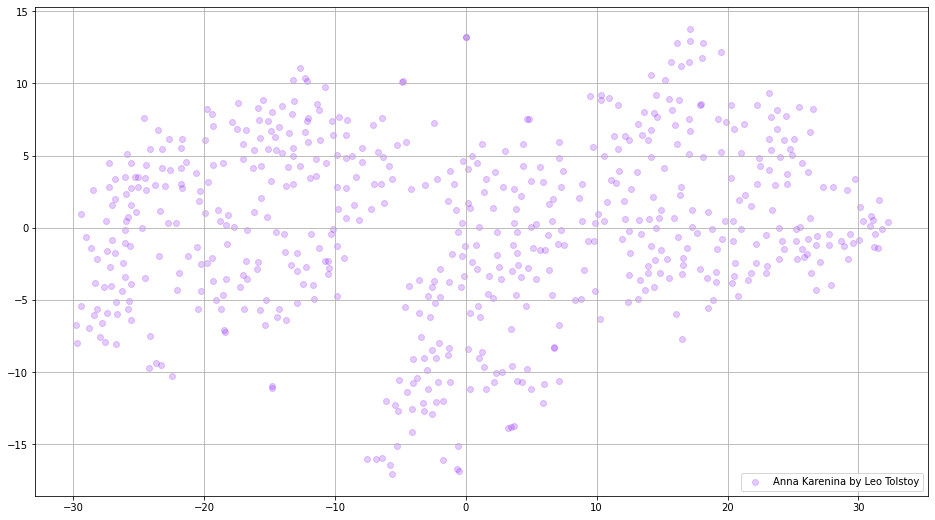

In [60]:
run_tsne_plot_ak()

### Plot the TSNE plot with words.

- Use `tsne_plot` funtion.

- Pass into `tsne_plot`:
  - `label`: 'Anna Karenina by Leo Tolstoy'
  - `embeddings`: embeddings_ak
  - `words`: words_ak
  - `a`: 0.2

In [61]:
def run_tsne_plot_words_ak():
    tsne_plot('Anna Karenina by Leo Tolstoy', embeddings_ak, words_ak, a= 0.2 ) # Write code to plot the TSNE values of Anna Karenina data with names here.

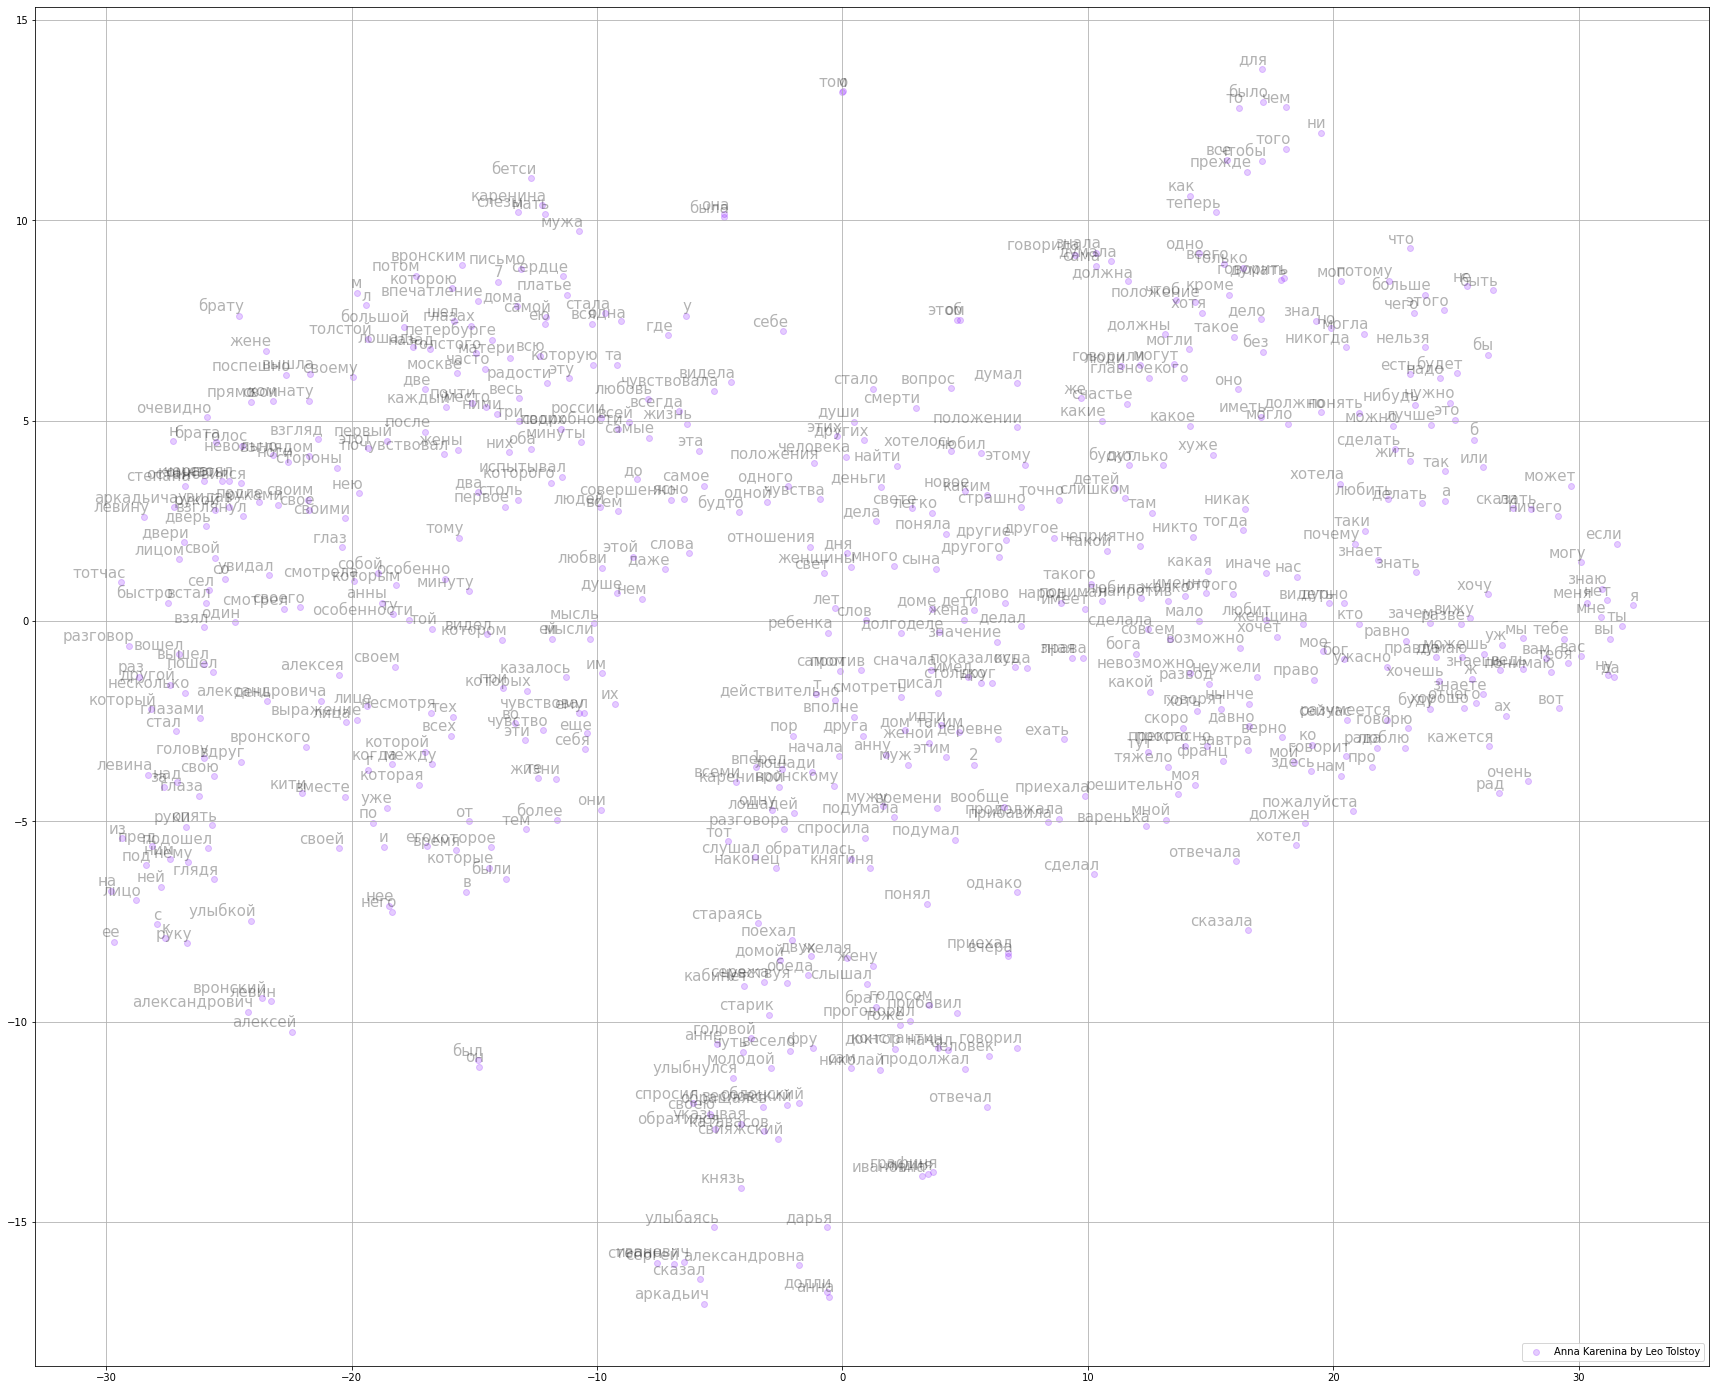

In [67]:
run_tsne_plot_words_ak()

## Visualizaing Word2Vec Vectors from War and Peace

### Prepare War and Peace Data for Word2Vec

- Use `prepare_for_w2v` funtion.

- Pass the following parameters to `prepare_for_w2v` in `run_prepare_wp`:
  - **filename_from**: 'War and Peace by Leo Tolstoy (ru).txt'
  - **filename_to**: 'train_war_and_peace_ru.txt'
  - **lang**: 'russian'

In [68]:
def run_prepare_wp():
  prepare_for_w2v('War and Peace by Leo Tolstoy (ru).txt', 'train_war_and_peace_ru.txt', 'russian' )
    # Write code to prepare War and Peace data for Word2Vec using prepare_for_w2v here.

In [69]:
run_prepare_wp()

### Train Word2Vec Model for War and Peace data

- Use `train_word2vec` function.

- Pass **'train_war_and_peace_ru.txt'** to `train_word2vec` in `run_train_word2vec_wp`.

In [70]:
def run_train_word2vec_wp():
    model_wp = train_word2vec('train_war_and_peace_ru.txt') # Write code to train word2vec model for War and Peace data using train_word2vec here.

    return model_wp

In [71]:
model_wp = run_train_word2vec_wp()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [73]:
words_wp = []
embeddings_wp = []

for word in list(model_wp.wv.vocab):
    embeddings_wp.append(model_wp.wv[word])
    words_wp.append(word)

### Create TSNE object for War and Peace data

- Create a `tsne_wp` object.

- Pass `perplexity` equal to **40**, `n_components` equal to **2**, `init` equal to **'pca'**, `n_iter` equal to **3500**, and `random_state` equal to **32** into the `TSNE` class.

In [74]:
def run_tsne_wp():
    tsne_wp = TSNE(n_components=2, perplexity=40.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=3500, n_iter_without_progress=300, 
                    min_grad_norm=1e-07, metric='euclidean', init='pca', verbose=0, random_state=32, method='barnes_hut', angle=0.5, n_jobs=None)# Write code to create TSNE object here.

    return tsne_wp

In [75]:
tsne_wp = run_tsne_wp()

### Fit the TSNE object

- Fit the `tsne_wp` object using `fit_transform` method.

- Pass **embeddings_wp** into the `fit_transform` method.

In [76]:
def fit_tsne_wp(embeddings_wp):
    embeddings_wp = tsne_wp.fit_transform(embeddings_wp) # Write code to fit the tsne_wp object here.
    
    return embeddings_wp

In [77]:
embeddings_wp = fit_tsne_wp(embeddings_wp)

### Plot the TSNE plot.

- Use `tsne_plot` funtion.

- Pass into `tsne_plot`:
  - `label`: 'War and Peace by Leo Tolstoy'
  - `embeddings`: embeddings_wp
  - `a`: 0.2

In [78]:
def run_tsne_plot_wp():
    tsne_plot( 'War and Peace by Leo Tolstoy',embeddings_wp, ' ' , a= 0.2)# Write code to plot the TSNE values of War and Peace data here.

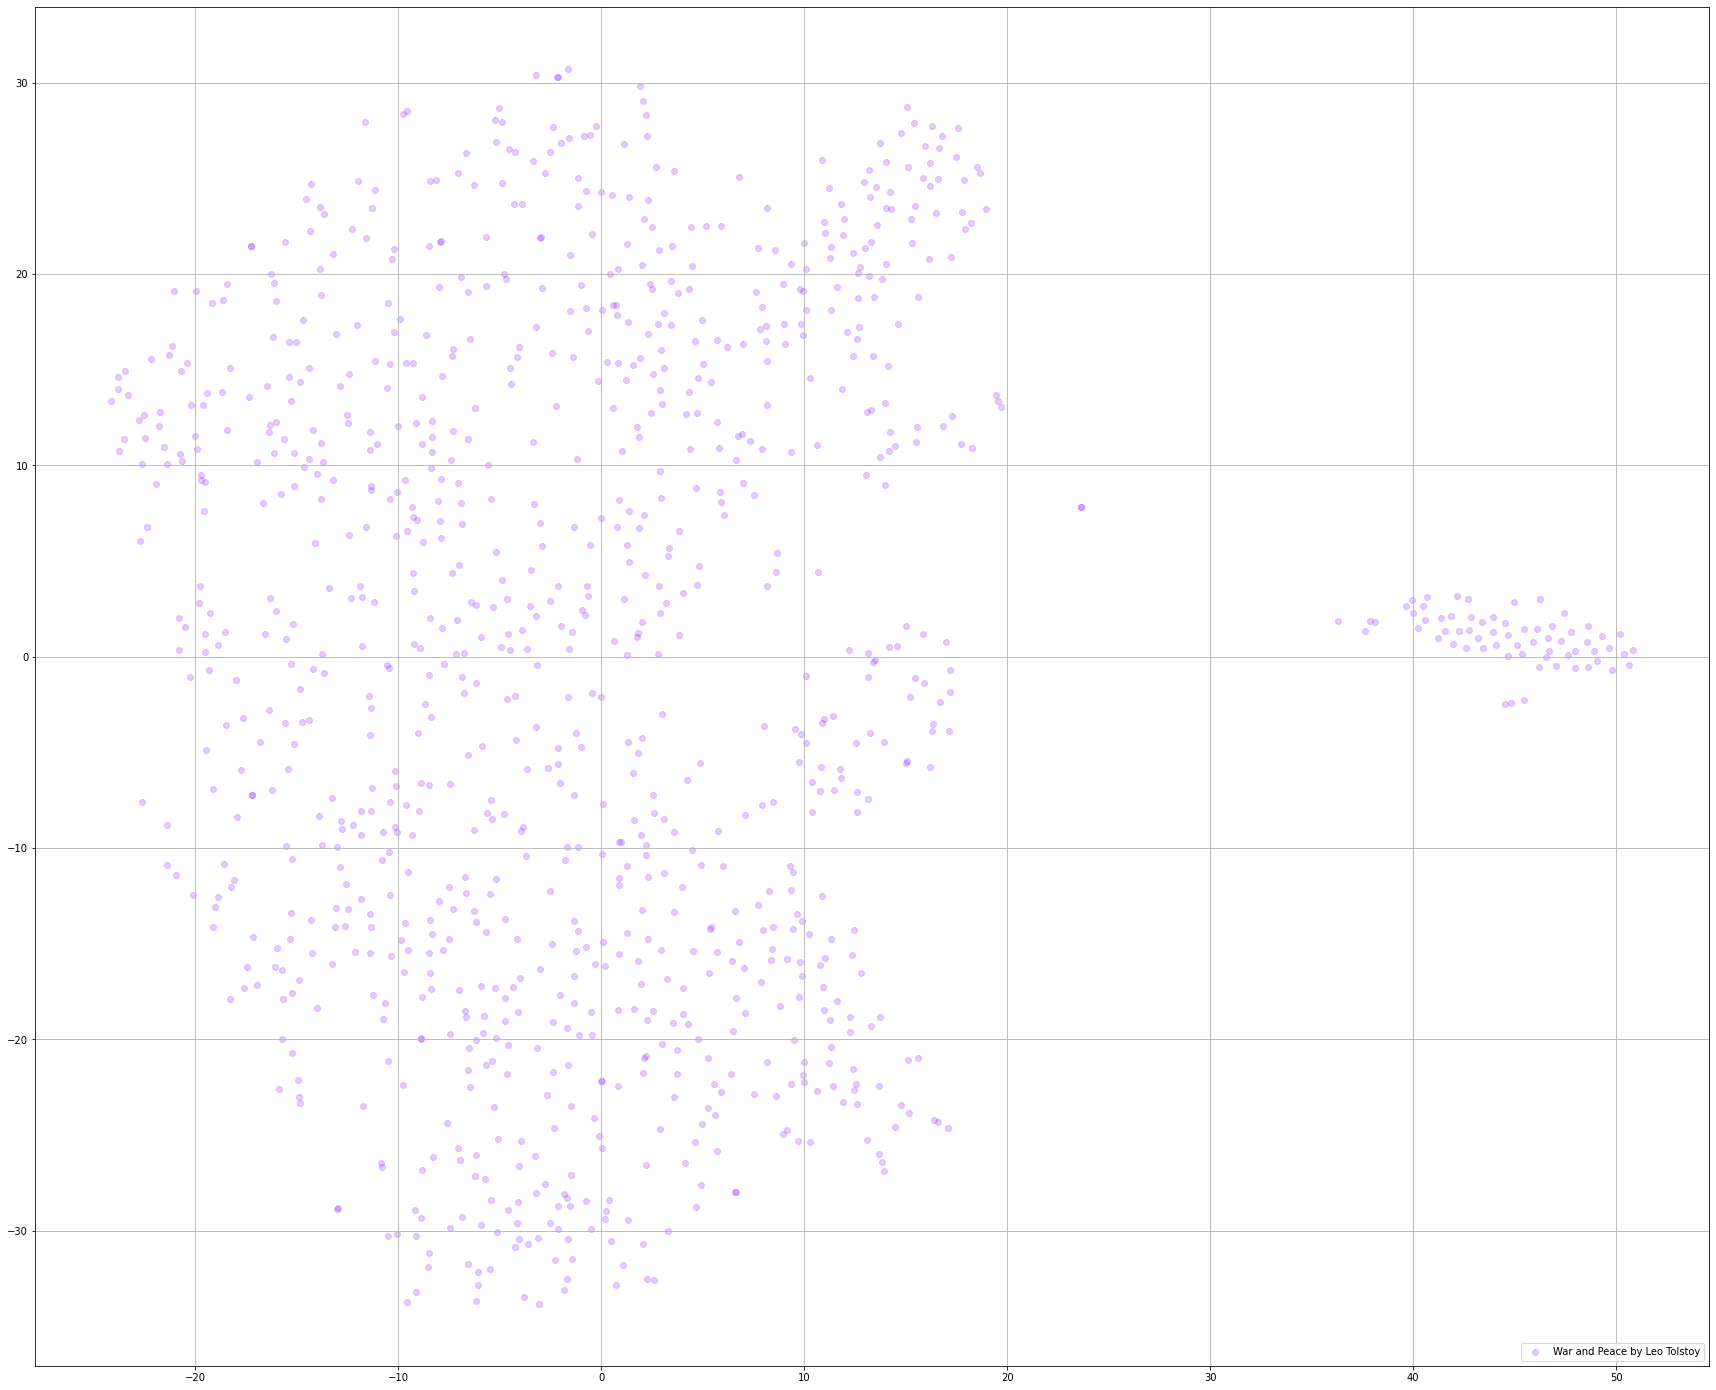

In [79]:
run_tsne_plot_wp()

### Plot the TSNE plot with words.

- Use `tsne_plot` funtion.

- Pass into `tsne_plot`:
  - `label`: 'War and Peace by Leo Tolstoy with words'
  - `embeddings`: embeddings_wp
  - `words`: words_wp
  - `a`: 0.15

In [80]:
def run_tsne_plot_words_wp():
    tsne_plot( 'War and Peace by Leo Tolstoy with words',embeddings_wp, words_wp , a= 0.2)# Write code to plot the TSNE values of War and Peace data with names here.

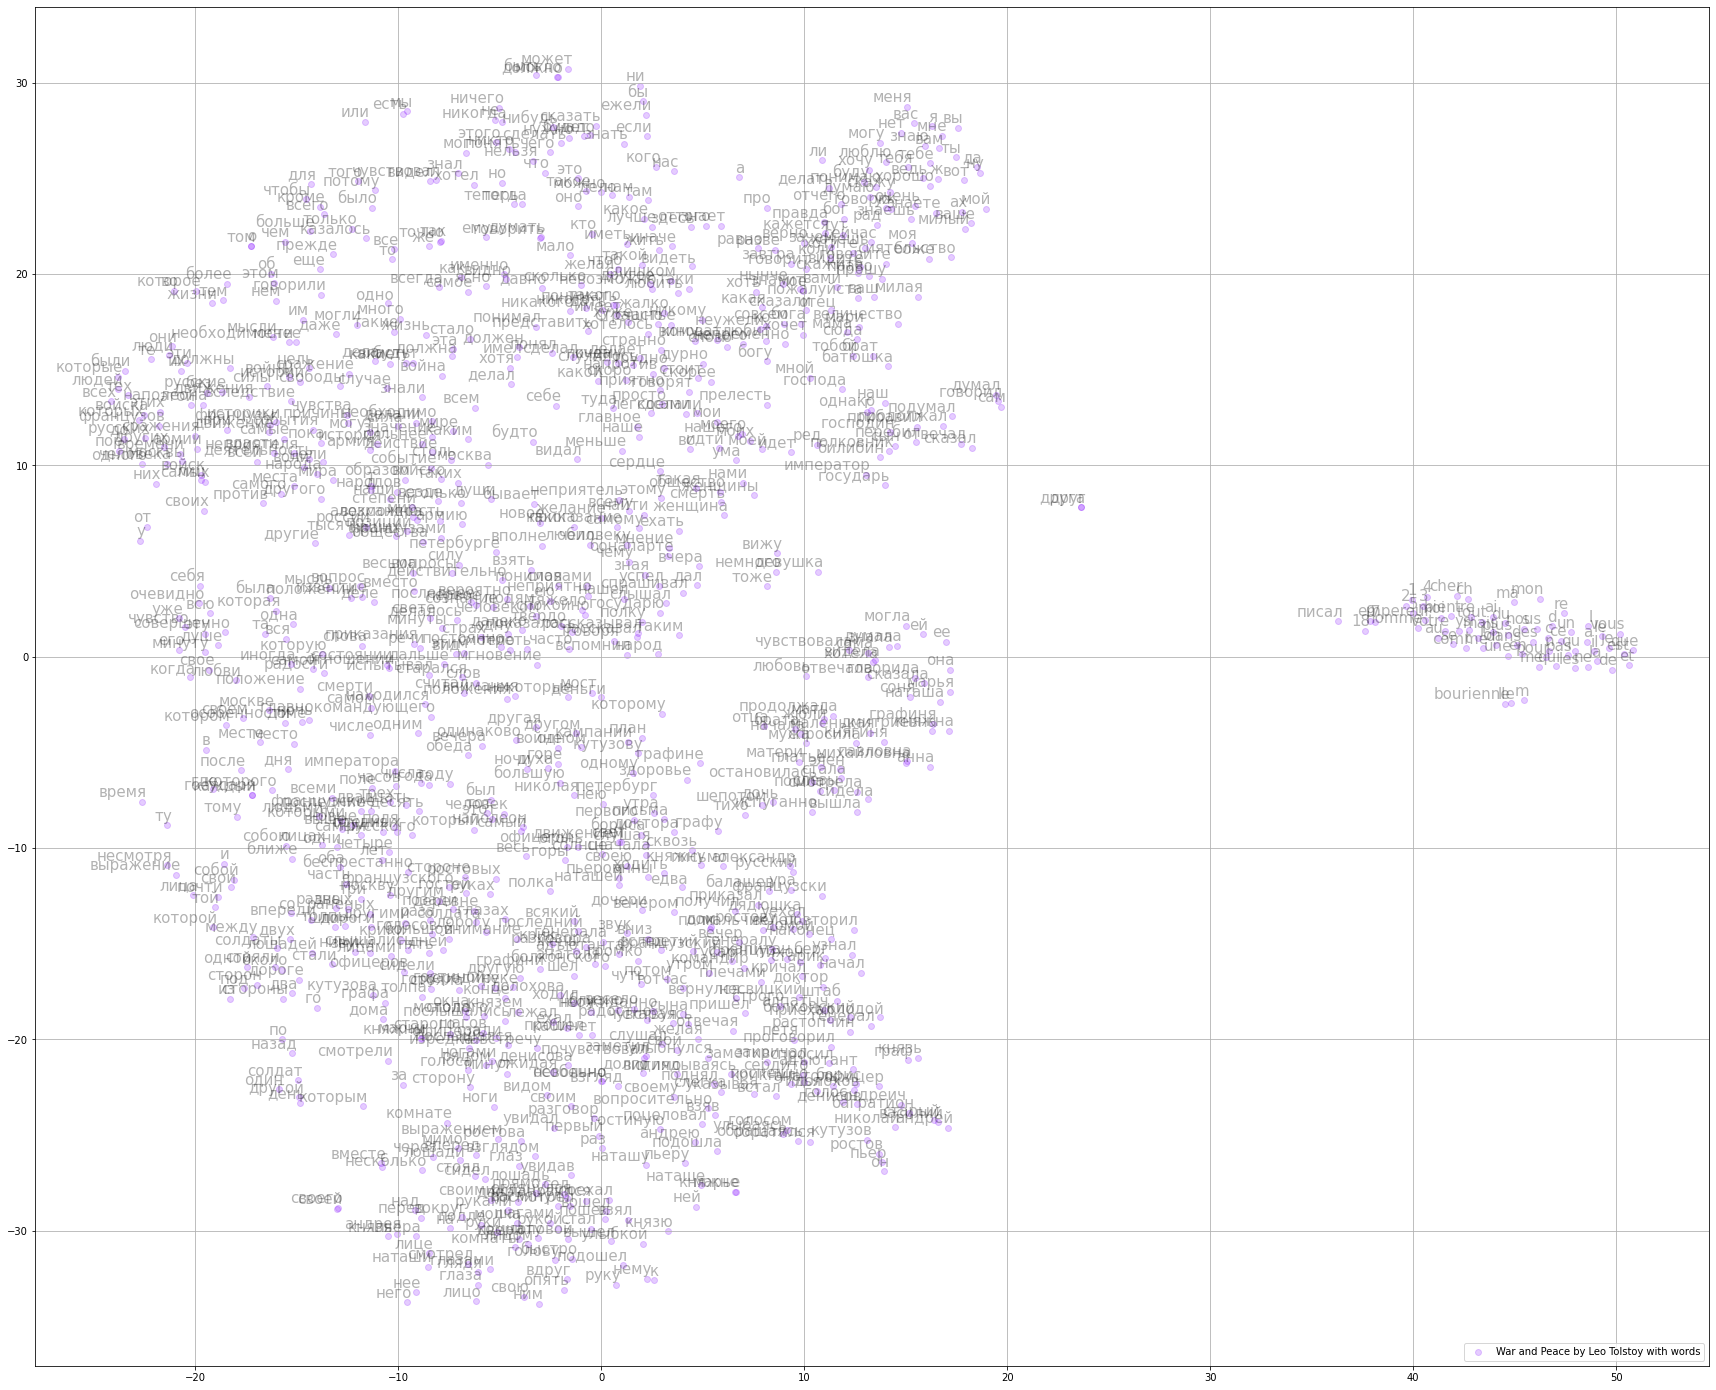

In [81]:
run_tsne_plot_words_wp()